In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('train.csv')
print(df.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1     

In [35]:
df.shape

(1054, 19)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Case_No,1054.0,527.500000,304.407895,1.0,264.25,527.5,790.75,1054.0
A1,1054.0,0.563567,0.496178,0.0,0.00,1.0,1.00,1.0
A2,1054.0,0.448767,0.497604,0.0,0.00,0.0,1.00,1.0
A3,1054.0,0.401328,0.490400,0.0,0.00,0.0,1.00,1.0
A4,1054.0,0.512334,0.500085,0.0,0.00,1.0,1.00,1.0
A5,1054.0,0.524668,0.499628,0.0,0.00,1.0,1.00,1.0
A6,1054.0,0.576850,0.494293,0.0,0.00,1.0,1.00,1.0
A7,1054.0,0.649905,0.477226,0.0,0.00,1.0,1.00,1.0
A8,1054.0,0.459203,0.498569,0.0,0.00,0.0,1.00,1.0
A9,1054.0,0.489564,0.500128,0.0,0.00,0.0,1.00,1.0


In [38]:
df['Ethnicity'].value_counts()

Ethnicity
White European    334
asian             299
middle eastern    188
south asian        60
black              53
Hispanic           40
Others             35
Latino             26
mixed               8
Pacifica            8
Native Indian       3
Name: count, dtype: int64

In [39]:
df['Jaundice'].value_counts()

Jaundice
no     766
yes    288
Name: count, dtype: int64

In [40]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

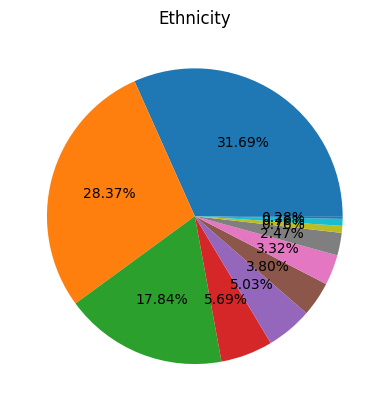

In [41]:
plt.pie(df['Ethnicity'].value_counts().values, autopct='%1.2f%%')
plt.title("Ethnicity")
plt.show()

In [42]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

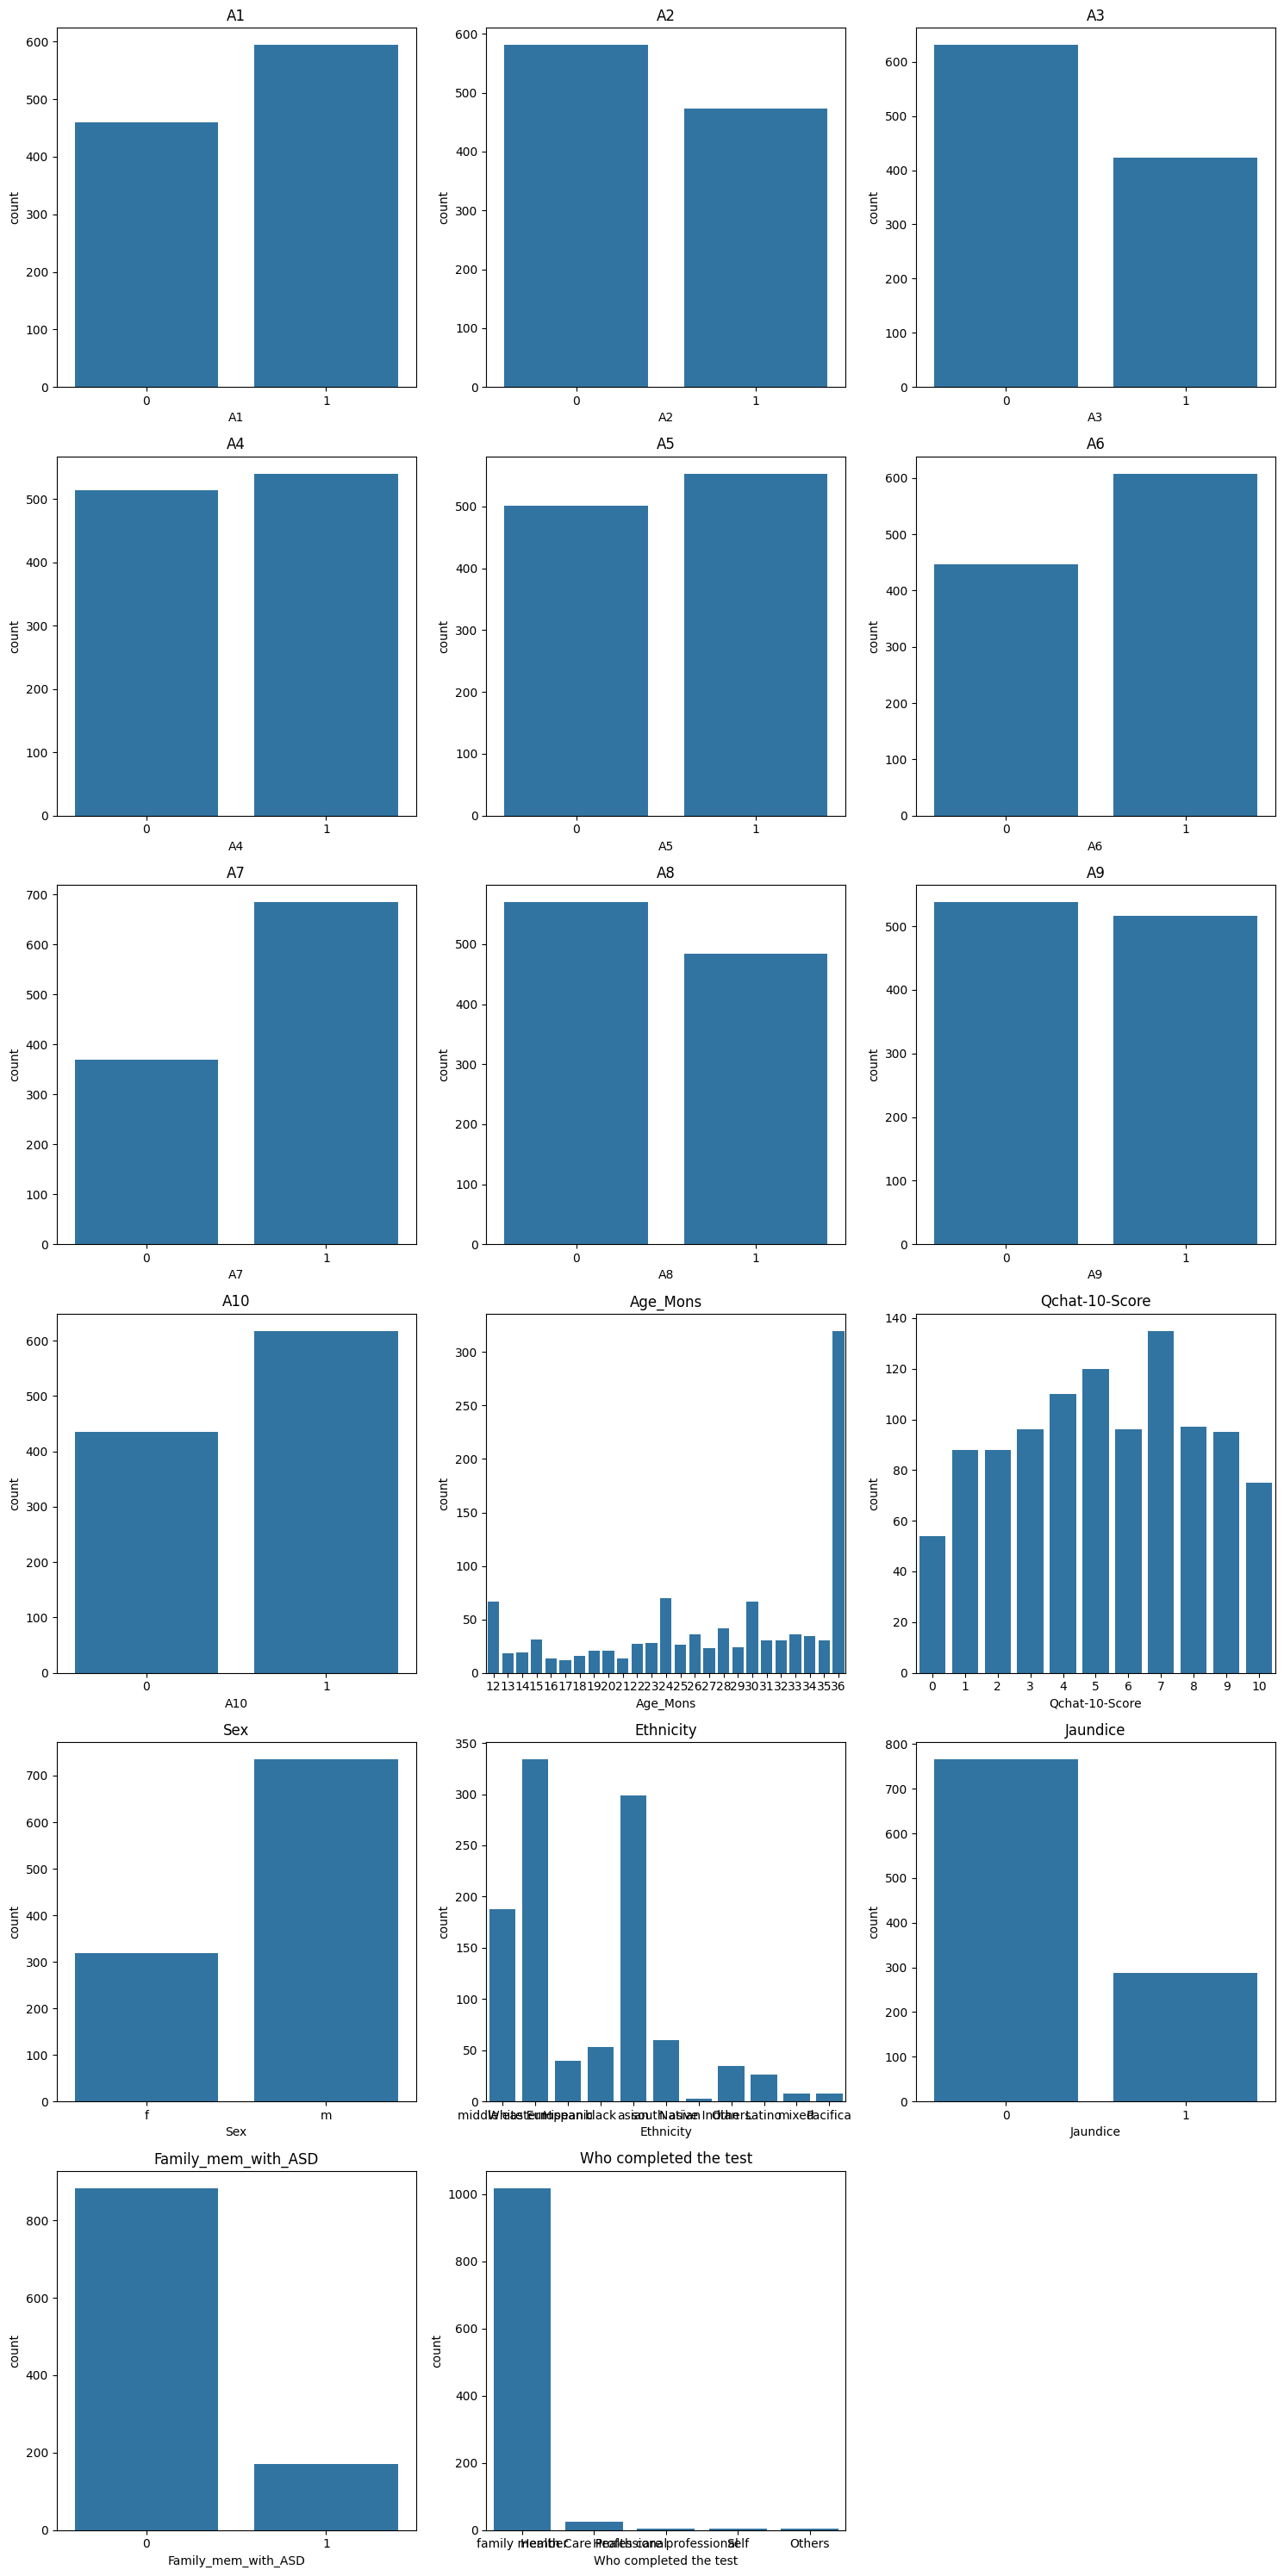

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt

# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# List of columns to plot
ints = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test']

# Determine the number of rows and columns for subplots
num_cols = 3
num_rows = (len(ints) + num_cols - 1) // num_cols  # This will round up the number of rows

# Create subplots
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the height based on the number of rows

for i, col in enumerate(ints):
    plt.subplot(num_rows, num_cols, i + 1)
    sb.countplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


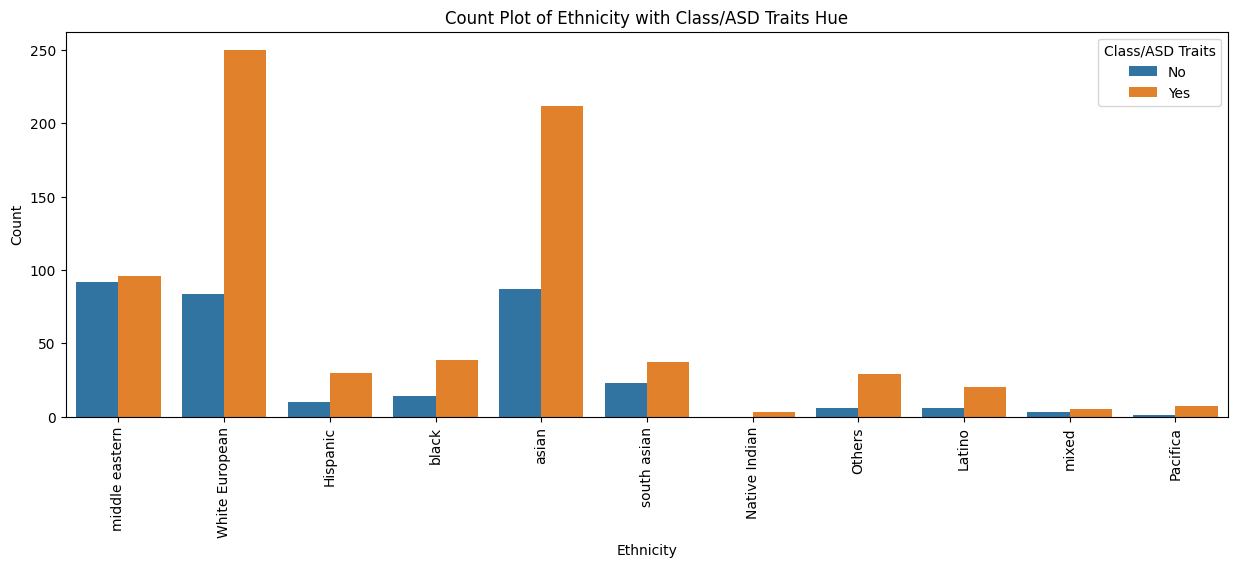

In [44]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Create the count plot
plt.figure(figsize=(15, 5))
sb.countplot(data=df, x='Ethnicity', hue='Class/ASD Traits')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Count Plot of Ethnicity with Class/ASD Traits Hue')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()


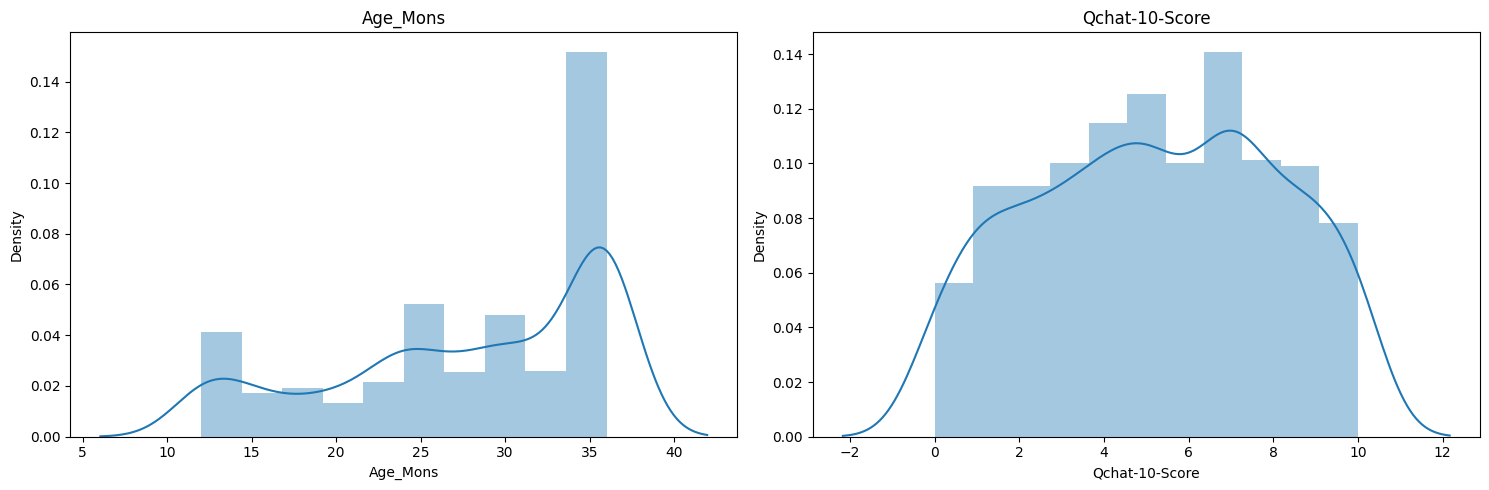

In [45]:
import seaborn as sb
import matplotlib.pyplot as plt


# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# List of float columns to plot
floats = ['Age_Mons', 'Qchat-10-Score']

# Create subplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(floats):
    plt.subplot(1, 2, i + 1)
    sb.distplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


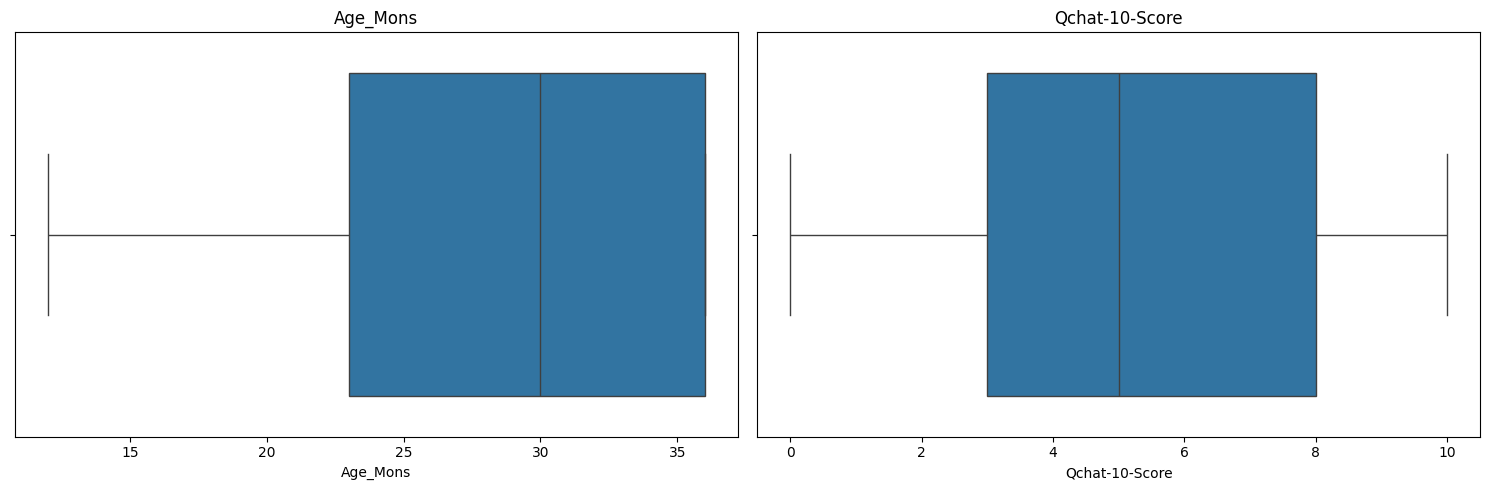

In [46]:
import seaborn as sb
import matplotlib.pyplot as plt


# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# List of float columns to plot
floats = ['Age_Mons', 'Qchat-10-Score']

# Create subplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(floats):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [50]:
df = df[df['Qchat-10-Score'] > -5]

# Getting the shape of the DataFrame after filtering
print("Shape of the DataFrame after filtering:", df.shape)


Shape of the DataFrame after filtering: (1054, 19)


In [53]:
# Define the convertAge function
def convertAge(age):
    if age < 48:  # Assuming age is in months, so 4 years = 48 months
        return 'Toddler'
    elif age < 144:  # 12 years = 144 months
        return 'Kid'
    elif age < 216:  # 18 years = 216 months
        return 'Teenager'
    elif age < 480:  # 40 years = 480 months
        return 'Young'
    else:
        return 'Senior'

# Apply the convertAge function to create the 'ageGroup' column
df['ageGroup'] = df['Age_Mons'].apply(convertAge)

# Display the DataFrame with the new 'ageGroup' column
print(df)


      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity  Jaundice  Family_mem_with_ASD  \
0                  3   f  middle eastern         1                    0   
1                  4   m  White E

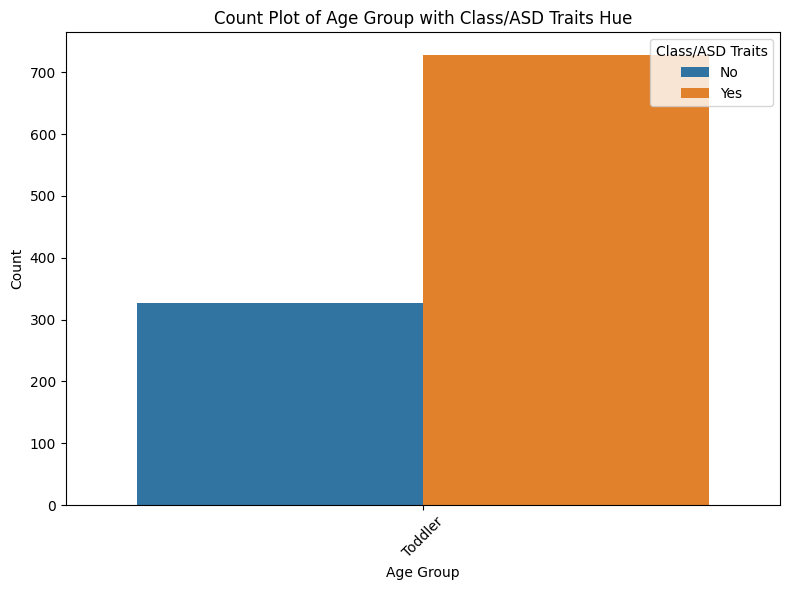

In [54]:
import seaborn as sb
import matplotlib.pyplot as plt

# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Create the count plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD Traits'])
plt.title('Count Plot of Age Group with Class/ASD Traits Hue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Class/ASD Traits', loc='upper right')  # Add legend with specified title and location
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [61]:
def add_feature(data):
    # Creating a column with all values zero
    data['sum_score'] = 0

    # Loop through columns from 'A1' to 'A10'
    for col in ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']:
        # Updating the 'sum_score' value with scores from A1 to A10
        data['sum_score'] += data[col]

    # Encoding categorical variables as numerical values
    data['Jaundice'] = data['Jaundice'].map({'yes': 1, 'no': 0})
    data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})
    data['Who completed the test'] = data['Who completed the test'].map({'family member': 1, 'health care professional': 0})

    # Creating the 'ind' column by adding the encoded columns
    data['ind'] = data['Jaundice'] + data['Family_mem_with_ASD'] + data['Who completed the test']

    return data

# Apply the add_feature function to DataFrame 'df'
df = add_feature(df)



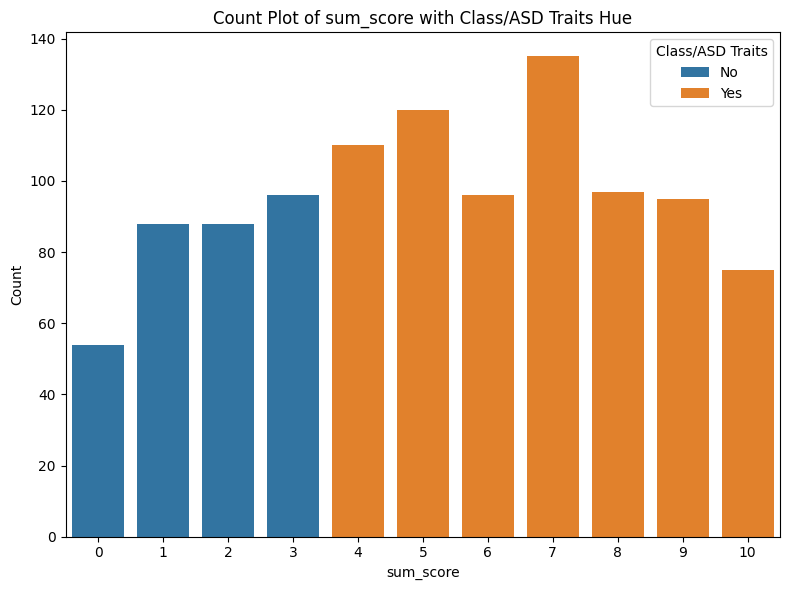

In [62]:
import seaborn as sb
import matplotlib.pyplot as plt

# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Create the count plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sb.countplot(x=df['sum_score'], hue=df['Class/ASD Traits'])
plt.title('Count Plot of sum_score with Class/ASD Traits Hue')
plt.xlabel('sum_score')
plt.ylabel('Count')
plt.legend(title='Class/ASD Traits', loc='upper right')  # Add legend with specified title and location
plt.tight_layout()
plt.show()


In [63]:
# Applying log transformations to remove the skewness of the data.
df['Age_Mons'] = df['Age_Mons'].apply(lambda x: np.log(x))


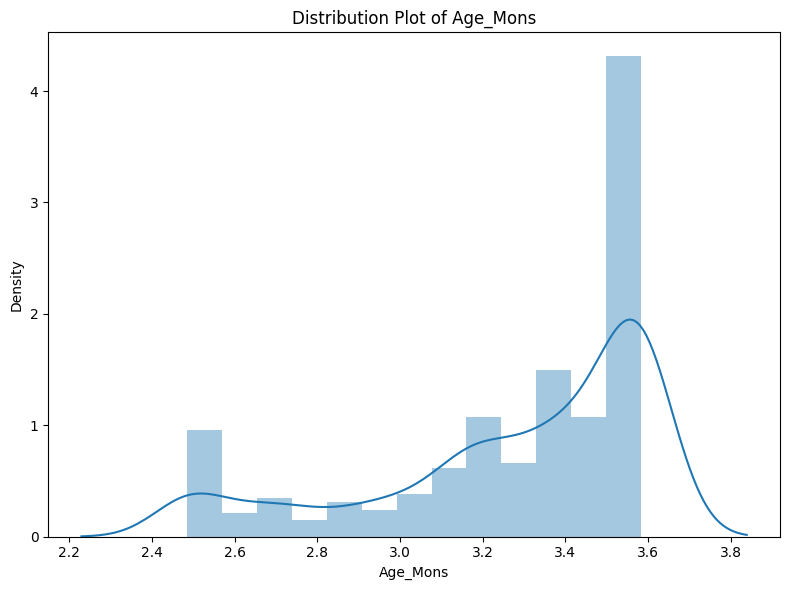

In [64]:
import seaborn as sb
import matplotlib.pyplot as plt

# Ensure there are no leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Create the distribution plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sb.distplot(df['Age_Mons'])
plt.title('Distribution Plot of Age_Mons')
plt.xlabel('Age_Mons')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

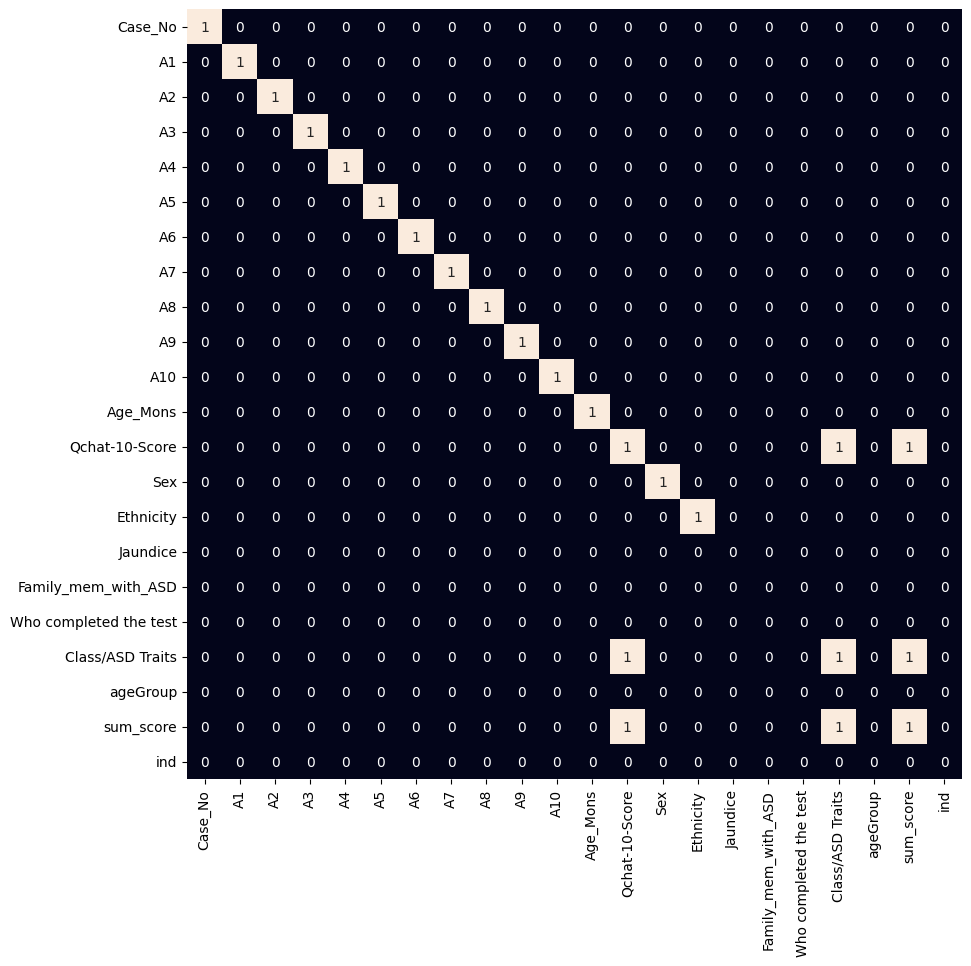

In [65]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(data):
    for col in data.columns:
        # Here we will check if datatype is object then we will encode it
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [68]:
rfeatures = df.drop(['Case_No', 'Class/ASD Traits'], axis=1)
target = df['Class/ASD Traits']

In [70]:
# Assuming df is your DataFrame containing the data
features = df.drop(['Case_No', 'Class/ASD Traits'], axis=1)
target = df['Class/ASD Traits']

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

# Balance the training set using Random Over Sampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_balanced, Y_train_balanced = ros.fit_resample(X_train, Y_train)

In [71]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

# Balance the training set using Random Over Sampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_balanced, Y_balanced = ros.fit_resample(X_train, Y_train)

# Print the shapes of the balanced dataset
print("Shape of balanced X:", X_balanced.shape)
print("Shape of balanced Y:", Y_balanced.shape)


Shape of balanced X: (1148, 20)
Shape of balanced Y: (1148,)


In [73]:
from sklearn.preprocessing import StandardScaler

# Normalizing the features for stable and fast training
scaler = StandardScaler()
X_balanced_normalized = scaler.fit_transform(X_balanced)
X_val_normalized = scaler.transform(X_val)


In [75]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_balanced_normalized_imputed = imputer.fit_transform(X_balanced_normalized)
X_val_normalized_imputed = imputer.transform(X_val_normalized)


In [77]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics

# Define the models with regularization parameters
models = [
    LogisticRegression(C=1.0, penalty='l2'),  # Adjust C for regularization strength
    XGBClassifier(alpha=0.1),  # Adjust alpha for regularization strength
    SVC(kernel='rbf', C=1.0)  # Adjust C for regularization strength
]

# Train and evaluate each model
for model in models:
    model.fit(X_balanced_normalized_imputed, Y_balanced)

    print(f'{model.__class__.__name__} :')
    print('Training ROC AUC Score:', metrics.roc_auc_score(Y_balanced, model.predict(X_balanced_normalized_imputed)))
    print('Validation ROC AUC Score:', metrics.roc_auc_score(Y_val, model.predict(X_val_normalized_imputed)))
    print()


LogisticRegression :
Training ROC AUC Score: 1.0
Validation ROC AUC Score: 1.0

XGBClassifier :
Training ROC AUC Score: 1.0
Validation ROC AUC Score: 1.0

SVC :
Training ROC AUC Score: 1.0
Validation ROC AUC Score: 0.9879813169286853



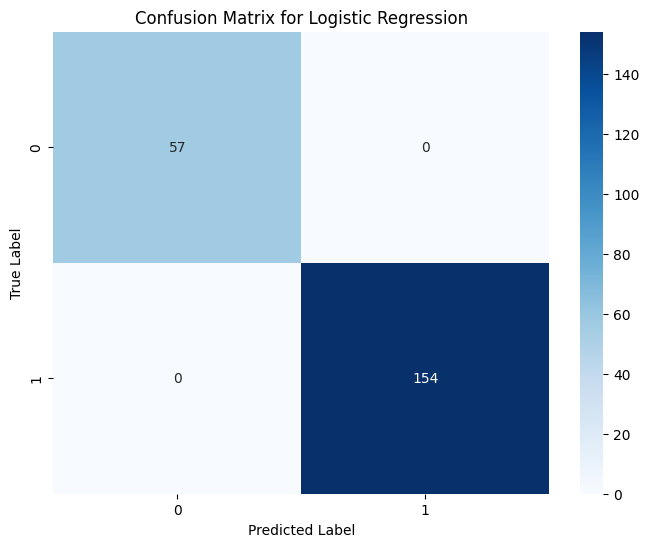

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for the first model (Logistic Regression)
conf_matrix = confusion_matrix(Y_val, models[0].predict(X_val_normalized_imputed))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

